# GAN (Generative Adversarial Networks) - генеративно-состязательные сети
![](https://github.com/tomsercu/gan-tutorial-pytorch/blob/master/figs/gan_xavigiro.png?raw=true)

    GAN - это класс генеративных моделей без контроля, которые неявно моделируют плотность данных.

        Базовая установка показана на рисунке выше. Есть две "конкурирующие" нейронные сети:
        * Генератор хочет научиться генерировать реалистичные изображения, неотличимые от реальных данных:
            - *Вход*: случайная выборка гауссовского шума. 
            - *выход*: точка данных (более высокой размерности).
        * Дискриминатор хочет отличить реальные и поддельные изображения:
            - *вход*: точка данных/изображение, 
            - *выход*: вероятность того, что точка данных настоящая. Представьте двоичный классификатор.
            
    Типичная аналогия: генератор похож на фальшивомонетчика, пытающегося сделать похожую на реальную монету подделку, а дискриминатор - на полицейского, пытающегося отличить подделку от настоящей работы.


В данной работе будет реализована модель GAN с полносвязными слоями дескриминатора и генератора на примере датасета MNIST.

# Подключение необходимых модулей

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import Subset

import matplotlib.pyplot as plt
%matplotlib inline

from LinGANcfg import device, BATCH, WORKERS, NOISE_DIM, EPOCHS, DEBUG, lr_D, lr_G
from LinGAN import Generator, Discriminator, train_GAN

print(f'Selected device is {device}')

Selected device is cuda:0


# Загрузка датасета MNIST

In [4]:
dataset = MNIST(root='.', transform=transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset=dataset, batch_size=BATCH, shuffle=True, num_workers=WORKERS )

## Изобразим 16 случайных изображений из выборки

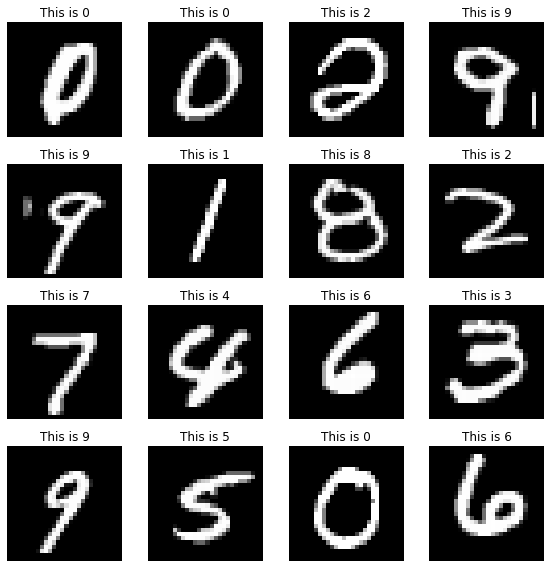

In [5]:
# plot 4x4 random images from the dataset
images, labels = next(iter(dataloader))
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'This is {labels[i]}')
plt.tight_layout()
plt.show()

# Полносвязная генеративно-состязательная сеть (GAN) на датасете MNIST

## Определение модели

In [9]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)
optim_G = optim.Adam(params=generator.parameters(), lr=lr_G)
optim_D = optim.Adam(params=discriminator.parameters(), lr=lr_D)

criterion = nn.BCELoss()

## Цикл обучения

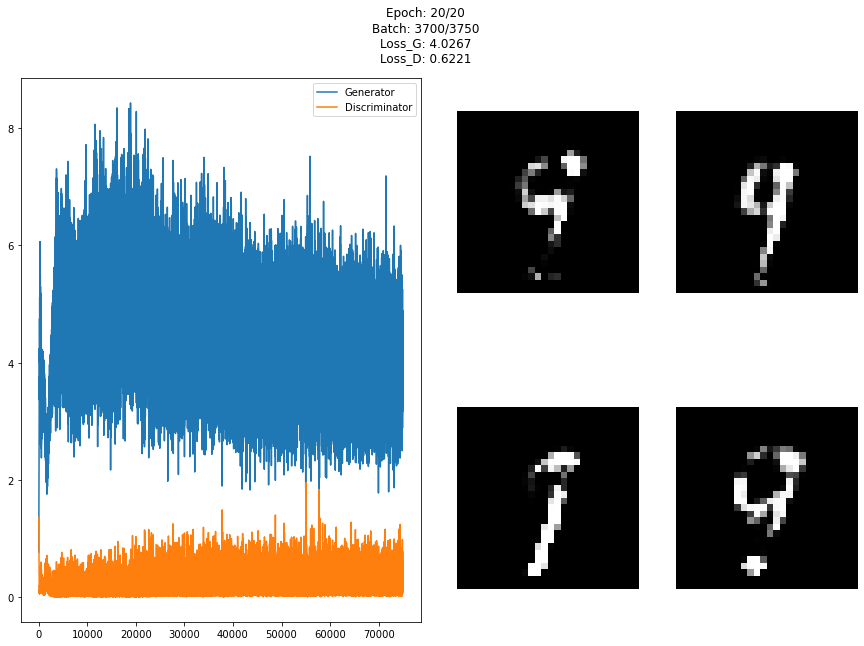

In [10]:
train_GAN(generator, discriminator, criterion, optim_G, optim_D, dataloader, epochs=EPOCHS, debug=DEBUG)

Сохраним веса модели

In [13]:
# save state_dict of generator
torch.save(generator.state_dict(), './weights/lin_generator_ones.pth')

## Визуализация 100 результатов семплирования из гауссовского шума

Загрузим веса модели

In [ ]:
generator.load_state_dict(torch.load('./weights/lin_generator_ones.pth'))

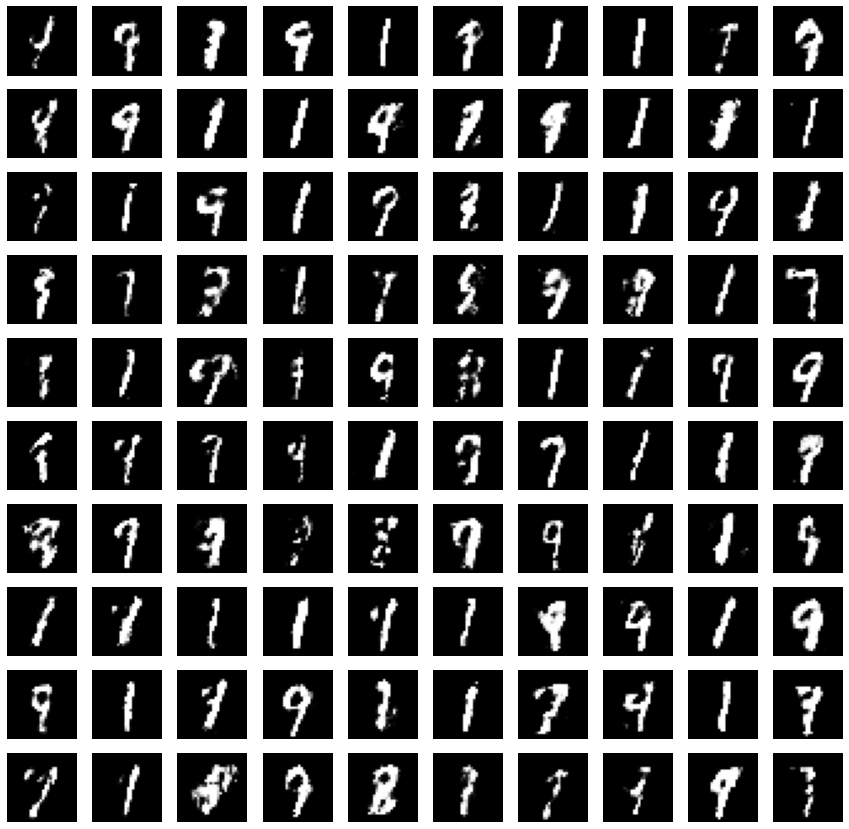

In [11]:
generator.plot_results()

## Вывод
    Как можно видеть из результата, модель GAN с полносвязными слоями дескриминатора и генератора на примере датасета MNIST справилась с задачей генерации изображений цифр, однако среди сгенерированных изображений преобладают изображения цифр 1 и 7, что вероятно связано с тем, что эти цифры проще изобразить и они сильнее всего отличаются от других цифр.

# Полносвязная генеративно-состязательная сеть (GAN) на обрезанном датасете MNIST (без цифр 1)
    Давайте выбросим все единицы и обчуимся на получившемся датасете.

## Отборка датасета и инициализация модели

In [14]:
indices = [idx for idx, target in enumerate(dataset.targets) if target not in [1]]
dataset1 = Subset(dataset, indices)
dataloader1 = DataLoader(dataset=dataset1, batch_size=BATCH, shuffle=True, num_workers=WORKERS )

generator = Generator().to(device)
discriminator = Discriminator().to(device)

optim_G = optim.Adam(params=generator.parameters(), lr=0.0001)
optim_D = optim.Adam(params=discriminator.parameters(), lr=0.0001)

criterion = nn.BCELoss()

# Обучение модели

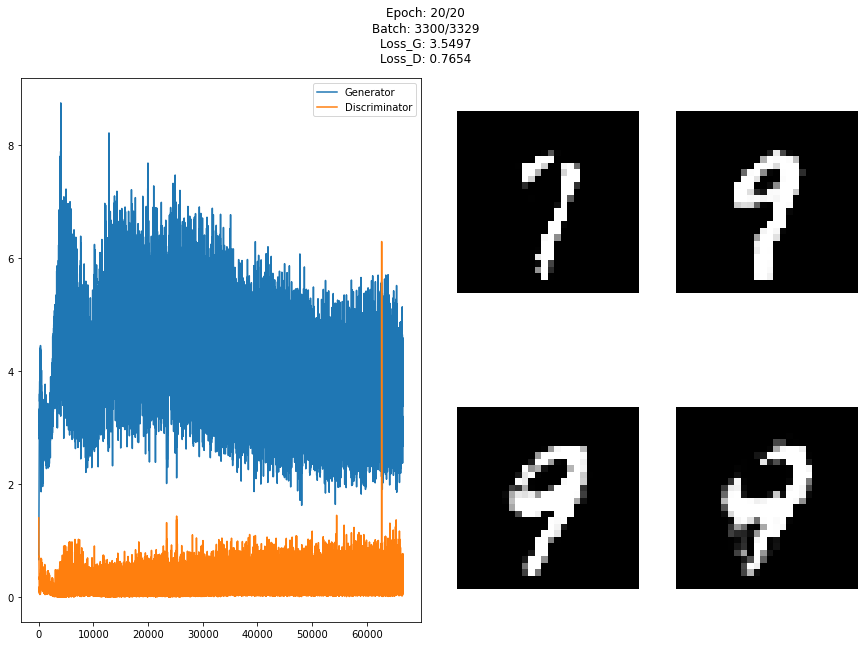

In [15]:
train_GAN(generator, discriminator, criterion, optim_G, optim_D, dataloader1, epochs=EPOCHS, debug=DEBUG)

Сохраним веса модели

In [16]:
torch.save(generator.state_dict(), 'lin_generator_not_ones.pth')

## Визуализация 100 результатов семплирования из гауссовского шума

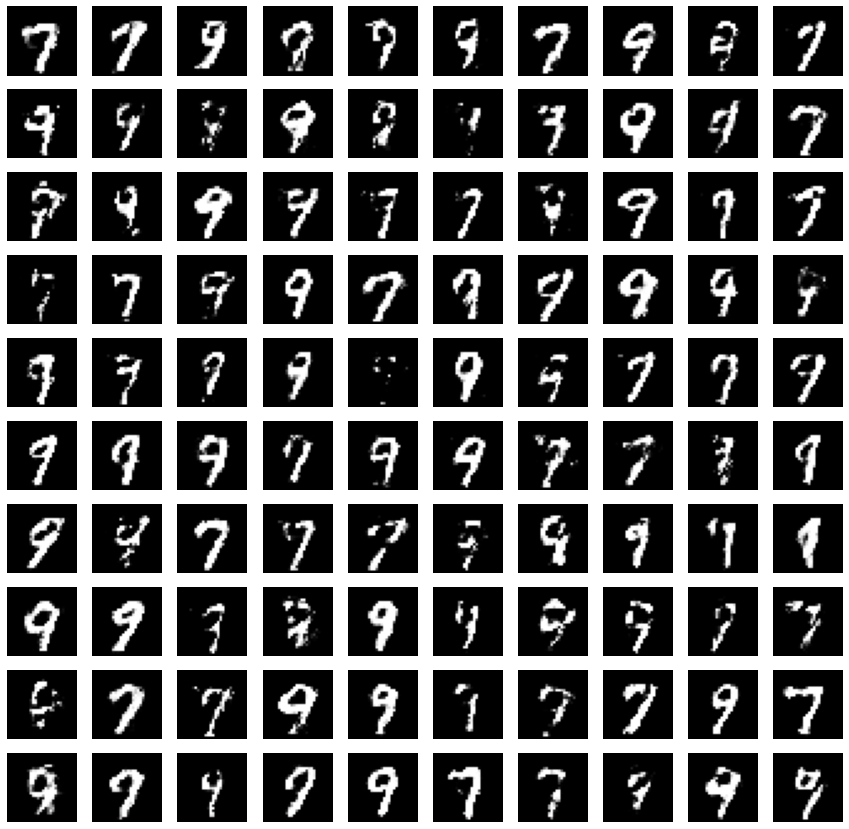

In [17]:
generator.plot_results()